# TERS Spectral Sum Visualization

This notebook demonstrates how to visualize the TERS Spectral Sum from .npz files, including overlaying the molecule structure for spatial context.

In [1]:
# Section 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from ase.data import chemical_symbols
from ase import Atoms
from ase.visualize.plot import plot_atoms


## Load .npz File and Extract Data

Load the .npz file and extract the relevant arrays: 'atom_pos', 'atomic_numbers', 'spectrums', and 'frequencies'.

In [7]:
# Section 2: Load .npz File and Extract Data
npz_file = "/scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_1.0/train/7923.npz"  # Update path as needed
with np.load(npz_file) as data:
    atom_pos = data['atom_pos']
    atomic_numbers = data['atomic_numbers']
    spectrums = data['spectrums']
    frequencies = data['frequencies']
print('atom_pos shape:', atom_pos.shape)
print('atomic_numbers:', atomic_numbers)
print('spectrums shape:', spectrums.shape)
print('frequencies shape:', frequencies.shape)

atom_pos shape: (9, 3)
atomic_numbers: [8 8 8 6 6 6 6 1 1]
spectrums shape: (256, 256, 21)
frequencies shape: (21,)


## Compute TERS Spectral Sum

Sum the spectral channels across the third axis of the 'spectrums' array to obtain the spectral sum image.

In [8]:
# Section 3: Compute TERS Spectral Sum
# Sum across all spectral channels (axis=2)
spectral_sum = np.sum(spectrums, axis=2)
print('Spectral sum shape:', spectral_sum.shape)

Spectral sum shape: (256, 256)


## Visualize TERS Spectral Sum

Display the spectral sum image using matplotlib's imshow with an appropriate colormap.

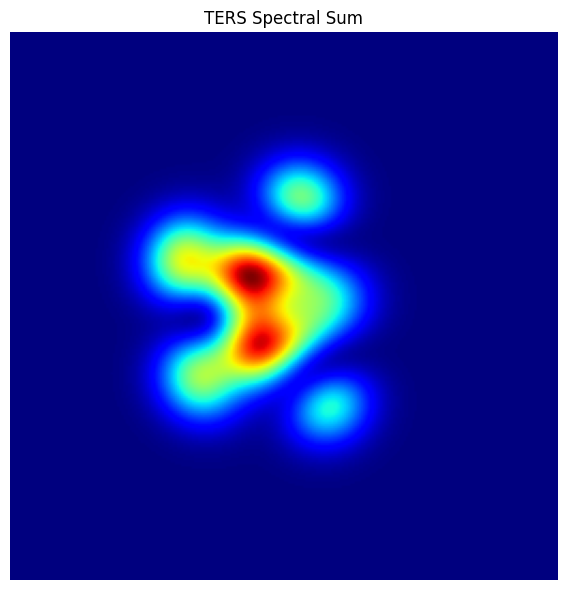

In [9]:
# Section 4: Visualize TERS Spectral Sum
plt.figure(figsize=(6, 6))
plt.imshow(spectral_sum, cmap='jet', origin='lower')
plt.title('TERS Spectral Sum')
plt.axis('off')
plt.tight_layout()
plt.show()

## Overlay Molecule Structure on Spectral Sum

Overlay the molecule's atomic positions and numbers on the spectral sum image for spatial context.

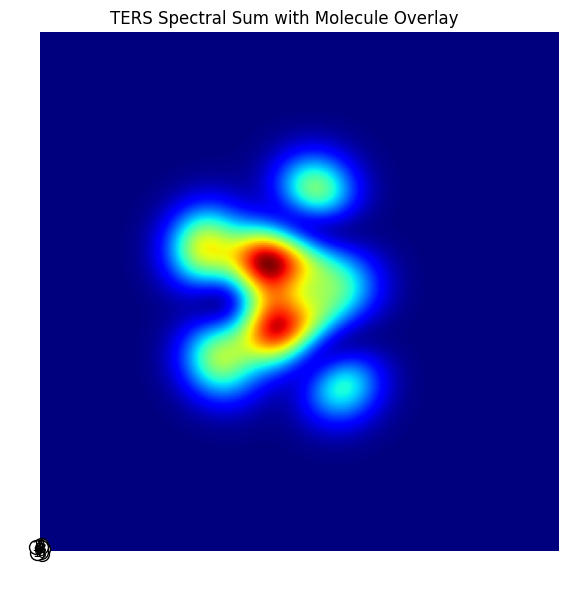

In [10]:
# Section 5: Overlay Molecule Structure on Spectral Sum
plt.figure(figsize=(6, 6))
plt.imshow(spectral_sum, cmap='jet', origin='lower')
plt.title('TERS Spectral Sum with Molecule Overlay')
plt.axis('off')
for i, pos in enumerate(atom_pos):
    plt.scatter(pos[0], pos[1], s=100, c='white', edgecolors='black', zorder=2)
    plt.text(pos[0], pos[1], str(atomic_numbers[i]), color='black', fontsize=10, ha='center', va='center', zorder=3)
plt.tight_layout()
plt.show()

## Save Spectral Sum Visualization

Save the spectral sum visualization (with overlay) as a PNG or SVG file.

In [11]:
# Section 6: Save Spectral Sum Visualization
output_path = 'ters_spectral_sum_overlay.png'
plt.figure(figsize=(6, 6))
plt.imshow(spectral_sum, cmap='jet', origin='lower')
plt.title('TERS Spectral Sum with Molecule Overlay')
plt.axis('off')
for i, pos in enumerate(atom_pos):
    plt.scatter(pos[0], pos[1], s=100, c='white', edgecolors='black', zorder=2)
    plt.text(pos[0], pos[1], str(atomic_numbers[i]), color='black', fontsize=10, ha='center', va='center', zorder=3)
plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()
print(f'Saved visualization to {output_path}')

Saved visualization to ters_spectral_sum_overlay.png
